In [2]:
import pandas as pd
import numpy as np
import sklearn 
import csv 
from sklearn.model_selection import KFold


# 1 Exercise-1

## 1.1 Data Exploration

### Q1.1.1 
Load the dataset into a DataFrame and display the first 5 rows. Print the dataset
information and summary statistics.

In [3]:
wine_data = pd.read_csv("WineQT.csv")
print(wine_data.head(5))


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
wine_data_stat = wine_data.describe()
print(wine_data_stat)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

### Q1.1.2 Which features show the highest variation based on summary statistics?

In [6]:
highest_column_name = ""
highest_std_per_mean = 0

for column in wine_data:
    print(f"Feature: {column}")
    standard_deviation_compared_to_mean = wine_data_stat[column]["std"]/wine_data_stat[column]["mean"]
    if standard_deviation_compared_to_mean > highest_std_per_mean:
        highest_column_name = column
        highest_std_per_mean = standard_deviation_compared_to_mean

    print(f"Standard deviation per its mean: {standard_deviation_compared_to_mean} \n")

Feature: fixed acidity
Standard deviation per its mean: 0.2102721277343028 

Feature: volatile acidity
Standard deviation per its mean: 0.3380766970044548 

Feature: citric acid
Standard deviation per its mean: 0.7329071175393311 

Feature: residual sugar
Standard deviation per its mean: 0.5354802330200567 

Feature: chlorides
Standard deviation per its mean: 0.5437237558831267 

Feature: free sulfur dioxide
Standard deviation per its mean: 0.6564308283094615 

Feature: total sulfur dioxide
Standard deviation per its mean: 0.7139790006058097 

Feature: density
Standard deviation per its mean: 0.0019313819550660807 

Feature: pH
Standard deviation per its mean: 0.04731602417241313 

Feature: sulphates
Standard deviation per its mean: 0.25907966722872433 

Feature: alcohol
Standard deviation per its mean: 0.10363762347836485 

Feature: quality
Standard deviation per its mean: 0.14244619789335092 

Feature: Id
Standard deviation per its mean: 0.5764158594092972 



In [7]:
print(f"The highest variation is from {highest_column_name} with a variance/mean of: {highest_std_per_mean}")

The highest variation is from citric acid with a variance/mean of: 0.7329071175393311


## 1.2 Correlation Analysis

### Q1.2.1 Compute the correlation matrix of all features.

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>,
        <Axes: xlabel='Id', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>

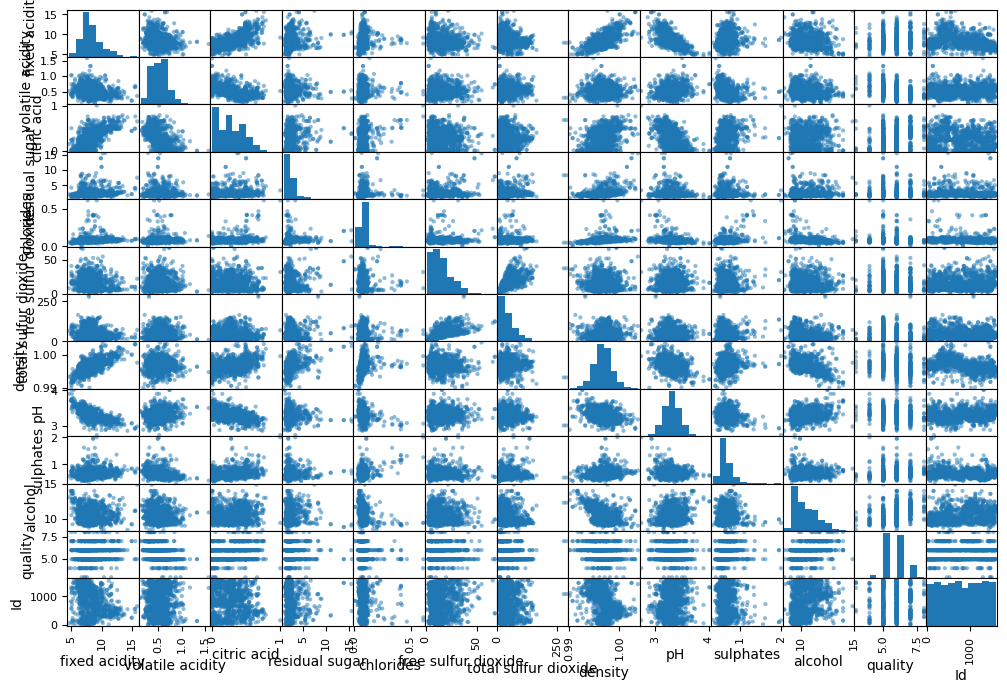

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(wine_data, figsize=(12,8))

In [9]:
correlation_matrix = round(wine_data.corr(), 2)
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00             -0.25         0.67   
volatile acidity              -0.25              1.00        -0.54   
citric acid                    0.67             -0.54         1.00   
residual sugar                 0.17             -0.01         0.18   
chlorides                      0.11              0.06         0.25   
free sulfur dioxide           -0.16             -0.00        -0.06   
total sulfur dioxide          -0.11              0.08         0.04   
density                        0.68              0.02         0.38   
pH                            -0.69              0.22        -0.55   
sulphates                      0.17             -0.28         0.33   
alcohol                       -0.08             -0.20         0.11   
quality                        0.12             -0.41         0.24   
Id                            -0.28             -0.01        -0.14   

                   

### Q1.2.2 Plot a heatmap of the correlation matrix

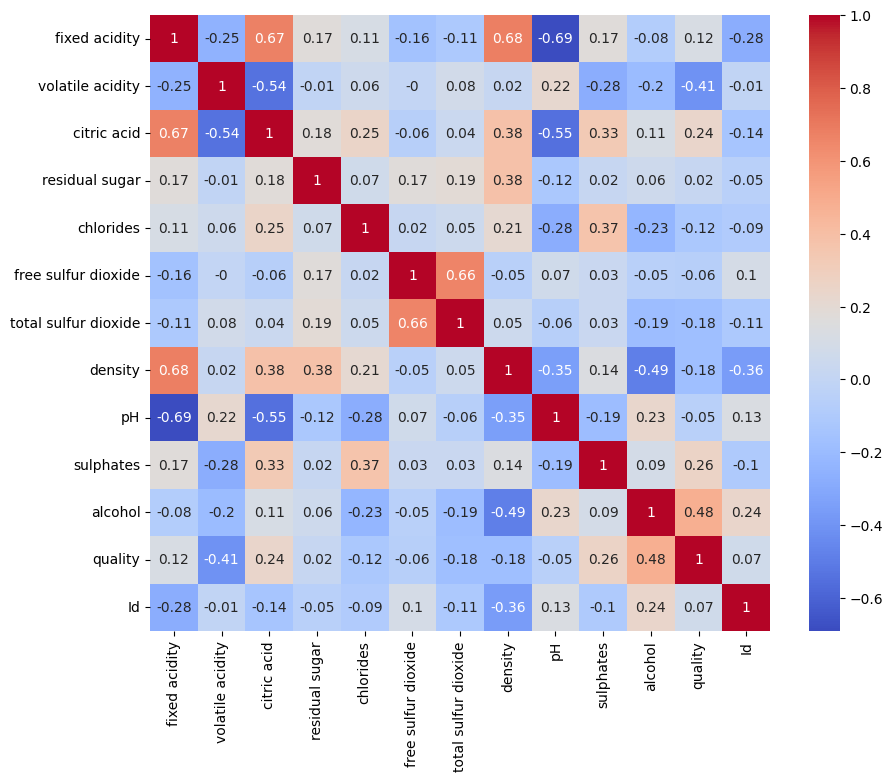

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.show()

### Q1.2.3 Which variable has the strongest positive correlation with quality? Which variable
### has the strongest negative correlation with quality?

Quality has the strongest positive correlation with alcohol which is at 0.48 and has the strongest negative correlation with volatile acidity with a -0.41. 

### Q1.2.4 Between alcohol and pH, which do you expect to better predict wine quality? Justify
### your answer.

I would expect that ph is a better predictor because i would imagine that ph has a strictly negative impact on the taste by making it sour. Alcohol on the other side can vary, where sometimes more alcohol makes it taste better, but sometimes less will make it taste better. 

## 1.3 Linear Regression

### Q1.3.1/Q1.3.3 Fit a simple linear regression model using gradient descent to predict quality using
### only chlorides.

In [11]:
y_quality = (wine_data["quality"]).to_numpy()
x_chlorides = (wine_data["chlorides"]).to_numpy().reshape(-1,1)

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=100, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(x_chlorides, y_quality)

/Users/joachim/miniconda3/envs/tfclean/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [12]:
x_alcohol = (wine_data["alcohol"]).to_numpy().reshape(-1,1)
sgd_reg_alc = SGDRegressor(max_iter=100, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=80)
sgd_reg_alc.fit(x_alcohol, y_quality)

/Users/joachim/miniconda3/envs/tfclean/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,80


In [13]:
print(f"Model with chlorides: intercept: {sgd_reg.intercept_} | Coefficent: {sgd_reg.coef_}")
print(f"Model with Alcohol: intercept: {sgd_reg_alc.intercept_} | Coefficent: {sgd_reg_alc.coef_}")



Model with chlorides: intercept: [5.65411801] | Coefficent: [0.04378061]
Model with Alcohol: intercept: [1.12327781] | Coefficent: [0.43487986]


In [14]:

print(wine_data_stat["chlorides"])



count    1143.000000
mean        0.086933
std         0.047267
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64


### Q1.3.4 Plot the regression line against the data points. Does the regression line fit the
### data well for chlorides or alcohol? Why or why not?

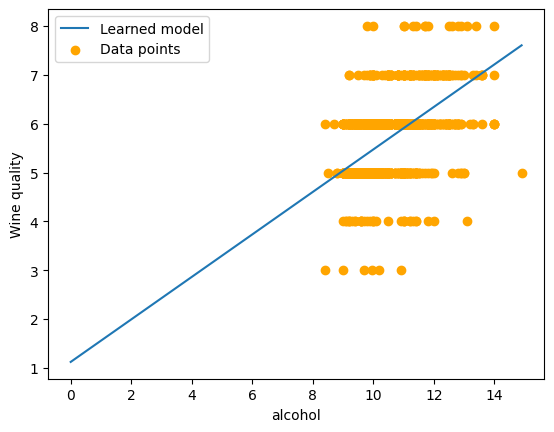

In [15]:
def plot_linera_regression(column, coeffisient, intercept):
    max_x = wine_data_stat[column]["max"]
    reg_line_x = np.linspace(0,max_x)
    reg_line_y = coeffisient*reg_line_x + intercept
    plt.plot(reg_line_x, reg_line_y,)
    plt.scatter(wine_data[column], wine_data["quality"], c="orange")
    plt.xlabel(column)
    plt.ylabel("Wine quality")
    plt.legend(["Learned model", "Data points"])
    plt.show()

plot_linera_regression("alcohol", sgd_reg_alc.coef_, sgd_reg_alc.intercept_)

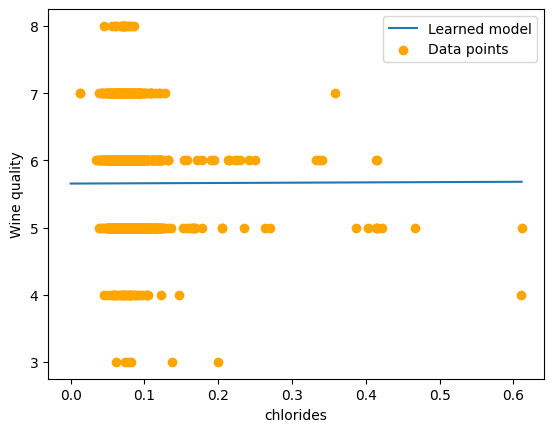

In [16]:
plot_linera_regression("chlorides", sgd_reg.coef_, sgd_reg.intercept_)

The data fit well for alcohol, we can see that there is a positive correlation between alcohol and wine quality, however there is no learned releationship between wine quality and chlorides, which is why the line is flat.

## 1.4 Train-Test Split

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_feature(X, y, feature_name):
    kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
    fold_results = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = SGDRegressor(
            max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, random_state=42
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        fold_results.append({"MSE": mse, "RMSE": rmse, "R2": r2})

    df = pd.DataFrame(fold_results)
    print(feature_name)
    print("Means:\n", df.mean(), "\n")
    print("Variances:\n", df.var() , "\n")
    return df

eval_feat = evaluate_feature(x_alcohol, y_quality, "alcohol")
eval_chlorides = evaluate_feature(x_chlorides, y_quality, "chlorides")


alcohol
Means:
 MSE     0.552935
RMSE    0.741995
R2      0.148593
dtype: float64 

Variances:
 MSE     0.006546
RMSE    0.002973
R2      0.002954
dtype: float64 

chlorides
Means:
 MSE     0.650931
RMSE    0.805737
R2     -0.004083
dtype: float64 

Variances:
 MSE     0.005506
RMSE    0.002149
R2      0.000019
dtype: float64 



### Q1.4.1 How well does alcohol alone predict wine quality in each split?

In [18]:
print("Scores for Alcohol and quality:")
print(eval_feat)

print("\n Scores for Chlorides and quality:")
print(eval_chlorides)

Scores for Alcohol and quality:
        MSE      RMSE        R2
0  0.459193  0.677638  0.174815
1  0.622233  0.788818  0.155043
2  0.547963  0.740245  0.191408
3  0.645539  0.803455  0.054259
4  0.489745  0.699818  0.167439

 Scores for Chlorides and quality:
        MSE      RMSE        R2
0  0.557403  0.746594 -0.001670
1  0.736311  0.858086  0.000133
2  0.685373  0.827873 -0.011359
3  0.684978  0.827634 -0.003520
4  0.590591  0.768499 -0.004000





R2 is between 0.05 and 0.2 across folds, which means is explains about 15% of the variances in wine quality. This means that there is some correlation here, but weak.


### Q1.4.2 How well does chloride alone predict wine quality in each split?

R2 is around 0 for all folds, which means it basically have 0 explaination for the wine quality.

### Q1.4.3 Do you think the model underfits? Why?

Yes we see that when we provide a single predicator that there is a small predictive power. Adding more features and making a more complex model might yield better results.

### Q1.4.4 Provide the mean and variance from the 5 different folds and comment on the
### variation in performance across all 5 folds when using alcohol versus chloride.
Alcohol:
Means:
MSE     0.552935,
RMSE    0.741995,
R2      0.148593
Variances:
 MSE     0.006546,
RMSE    0.002973,
R2      0.002954


Cholride:
Means:
 MSE     0.650931,
RMSE    0.805737,
R2     -0.004083
Variances:
 MSE     0.005506,
RMSE    0.002149,
R2      0.000019

We see that variances is very low compared to mean across all folds, which means the result are pretty stable.


## 1.5 Multiple Linear Regression

### Q1.5.1 Train a multiple linear regression model using all features to predict quality using
### the same splits as used in previous question. Evaluate the model on the test set
### using MSE, RMSE, and R2.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_all = wine_data.drop(columns=["quality", "Id"]).values
y = wine_data["quality"].values

kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(
        max_iter=2000, tol=1e-5, penalty=None, eta0=0.01, random_state=42
    ))
])

fold_results = []
for train_idx, test_idx in kf.split(X_all):
    X_train, X_val = X_all[train_idx], X_all[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    fold_results.append({"MSE": mse, "RMSE": rmse, "R2": r2})

mlr_results = pd.DataFrame(fold_results)
print("Multiple Linear Regression (scaled):")
print(mlr_results)
print("\nMeans:\n", mlr_results.mean())
print("\nVariances:\n", mlr_results.var())

residuals = y_test - y_pred


ValueError: Found input variables with inconsistent numbers of samples: [229, 228]

### Q1.5.2 Compare the results of simple vs multiple regression in terms of MSE, RMSE, and R2.

The mean of the R2 improved alot going up to 0.35, meaning the predictors have alot more explaining power. We also see that both the MSE and RMSE decreased by 0.1.

### Q1.5.3

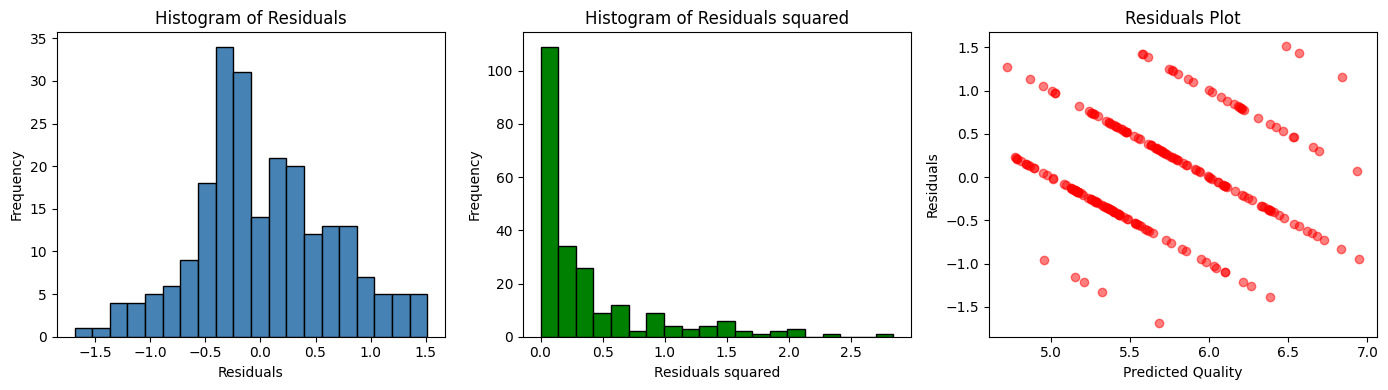

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

axs[0].hist(residuals, bins=20, color='steelblue', edgecolor='black')
axs[0].set_xlabel("Residuals")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Histogram of Residuals")

axs[1].hist(residuals**2, bins=20, color='green', edgecolor='black')
axs[1].set_xlabel("Residuals squared")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Histogram of Residuals squared")

residuals = y_test - y_pred
axs[2].scatter(y_pred, (residuals) , c="red", alpha=0.5)

axs[2].set_xlabel("Predicted Quality")
axs[2].set_ylabel("Residuals")
axs[2].set_title("Residuals Plot")


plt.tight_layout()
plt.show()

Linear regression and deep learning models using Mean squared error assumes homoscedacisty, which is a constant noise variance. However as we see in the residual plot, there is a pattern to the residuals, where it will get a higher error the more it predicts. Using MSE also assumes that the residuals are gaussian like, with a mean around 0,  which we can see is the case in the histogram of residuals. If we look at the histogram of squared residuals, we can see what the model actually uses as its loss function, where there are some heavy outliers.

Linear Regression Results:
        MSE      RMSE        R2
0  0.459193  0.677638  0.174815
1  0.622233  0.788818  0.155043
2  0.547963  0.740245  0.191408
3  0.645539  0.803455  0.054259
4  0.489745  0.699818  0.167439
Means:
 MSE     0.552935
RMSE    0.741995
R2      0.148593
dtype: float64
Variances:
 MSE     0.006546
RMSE    0.002973
R2      0.002954
dtype: float64


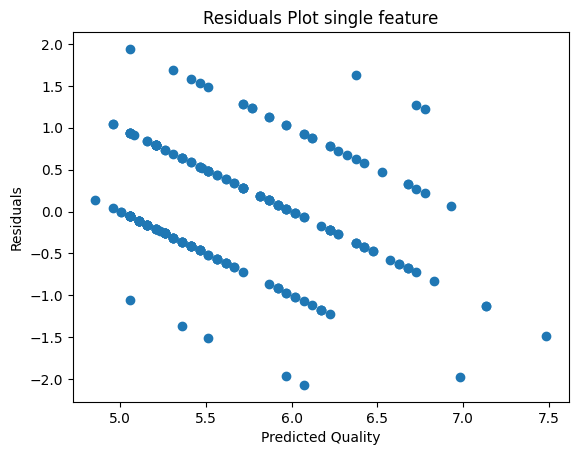

In [23]:
X_all = wine_data["alcohol"].values.reshape(-1, 1)
y = wine_data["quality"].values

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_results = []
for train_idx, test_idx in kf.split(X_all):
    X_train, X_test = X_all[train_idx], X_all[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = SGDRegressor(
        max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    fold_results.append({"MSE": mse, "RMSE": rmse, "R2": r2})

mlr_results = pd.DataFrame(fold_results)
print("Linear Regression Results:")
print(mlr_results)
print("Means:\n", mlr_results.mean())
print("Variances:\n", mlr_results.var())

residuals = (y_test - y_pred)
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals")
plt.title("Residuals Plot single feature")
plt.show()


### Q1.5.4 Which model performs better and why?

We see that the loss and residual still are similar for both models, which makes sense since linear models have assumptions of residual with mean 0. But R2 improved alot, more than double, which means that the model with only alcohol was underfitting and needed more degrees of freedom to better predict the quality. 

# 2 Exercise-2


### Q2.1 Which features are most suitable/influential in predicting wine quality? (Tip - You
### can consider feature importance ranking.)

In [24]:
from sklearn.ensemble import RandomForestRegressor

X = wine_data.drop(columns=["quality", "Id"])
y = wine_data["quality"]

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


alcohol                 0.284466
sulphates               0.137153
volatile acidity        0.132140
total sulfur dioxide    0.071119
pH                      0.059827
chlorides               0.056284
citric acid             0.055225
fixed acidity           0.055121
density                 0.051670
residual sugar          0.049447
free sulfur dioxide     0.047547
dtype: float64


Here we use a random forest regressor, which is a collection of decision trees which spilts the data based on features. It measures the loss by splitting it decision on the various features and if the splitting on a feature reduces the loss alot, then it is important. Here the importances are gotten from the Regressor and ranked from most important to least. We see the alcohol, sulpahtes and volatile acidity ahve the highest predictive power.

### Q2.2 The models you trained so far assume a linear relationship between features and target.
### Polynomial regression: Extend the feature space to include quadratic or interaction terms. Does this improve performance?

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

lin = LinearRegression()
scores = cross_val_score(lin, X_poly, y, scoring="r2", cv=5)
print("Polynomial R2 mean:", scores.mean())

Polynomial R2 mean: 0.22246703892193204


We see that this polynomial with 2 degrees get a lower R2, meaning a worse predicator for quality. This could mean that the multiple feature models dont explain the quality with a more complex model and the linear moodel perform better. 

###  Regularization: Train models using Ridge and Lasso regression. How do these methods affect the coefficients and model generalization?

In [26]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=0.5)
lasso = Lasso(alpha=0.001)

scores_ridge = cross_val_score(ridge, X, y, scoring="r2", cv=5)
print("Ridge R2 mean:", scores_ridge.mean())
scores_lasso = cross_val_score(lasso, X, y, scoring="r2", cv=5)
print("Lasso R2 mean:", scores_lasso.mean())




Ridge R2 mean: 0.31240667931515
Lasso R2 mean: 0.3116807192419184


Here we see that both Ridge and Lasso makes the R2 lower, which means less predictive power. This would indicate that a less complex model is not a better model and our model is not overfitting. 

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor(random_state=42, max_depth=4)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scored_decision_tree = cross_val_score(dt, X, y, scoring="r2", cv=5)
print("Decision Tree R2 mean:", scored_decision_tree.mean())
scored_random_forest = cross_val_score(rf, X, y, scoring="r2", cv=5)
print("Random Forest R2 mean:", scored_random_forest.mean())


Decision Tree R2 mean: 0.20224745146317744
Random Forest R2 mean: 0.3282221213121425


Again these R2 scores are lower than the multiple features linear model that had a r2 of 0.35. This would indicate that the predictors in the dataset have a mostly linear releationship with quality, like more alcohol will always give better quality.